# SMALL BUSINESS PERFORMANCE ANALYSIS IN GHANA

### Business Understanding

#### Overview

Small businesses in Ghana play a crucial role in driving the country’s economic growth, contributing significantly to GDP and employment. However, many of these businesses operate under financial constraints, lack access to data-driven decision-making, and face challenges in profitability and sustainability. This project analyzes a dataset simulating operational and financial records of small businesses across various regions in Ghana to uncover performance patterns and identify key factors influencing success.



#### Objectives

1. Understand the operational and financial structure of small businesses in Ghana.
2. Identify and address data quality issues such as missing values and inconsistent formats.
3. Engineer meaningful features to enhance model performance and insight generation.
4. Apply data preprocessing techniques like scaling, encoding, and normalization.
5. Generate actionable insights through visual analytics.
6. Answer key business questions using machine learning and AI techniques.



#### Problem Statement

Small businesses in Ghana often lack the analytical tools to understand what drives or hinders their performance. By exploring and modeling this data, we aim to identify which factors (e.g., region, business type, education of owners, advertising spend) most significantly influence profitability, customer satisfaction, and operational efficiency.

---

#### Stakeholders

* **Small Business Owners:** Want to understand what contributes to profitability and growth.
* **Policy Makers and Government Agencies:** Need insights for creating policies and support systems for SMEs.
* **Financial Institutions and NGOs:** Use data to assess risk and fund businesses effectively.
* **Data Analysts/Data Scientists:** Responsible for analyzing, cleaning, modeling, and interpreting the data.

---

#### Features (Key Parts of the Data)

* **Numerical Features:** `revenue`, `expenses`, `advertising`, `employee_count`, `customer_satisfaction`.
* **Categorical Features:** `region`, `business_type`, `owner_education`, `ownership_type`.
* **Derived Features (to be created):** `profit` (revenue - expenses), `profit_margin`, `profit_per_employee`.

---

#### Hypothesis

1. Businesses with higher advertising expenditure tend to have higher profit margins.
2. Owner education level positively correlates with business performance.
3. Customer satisfaction is higher in certain business types or regions.
4. Businesses in urban regions perform better financially than those in rural areas.
5. Higher employee count does not always translate to higher profit per employee.

---

#### 7 Business Questions (ML/AI-Driven) 

1. **Regression:** Can we predict the **profit** of a small business based on its revenue, expenses, region, and other features?
2. **Classification:** Can we classify businesses as **profitable or not** based on operational metrics?
3. **Clustering:** Can we segment businesses into meaningful **groups (clusters)** based on their financial and operational profiles?
4. **Recommendation:** Which type of **advertising strategy** yields better profit outcomes across business types?
5. **Customer Insight:** What features contribute to **higher customer satisfaction** scores?
6. **Feature Importance:** Which features are most influential in predicting **business success**?
7. **Anomaly Detection:** Can we detect **underperforming or risky businesses** based on outliers in profit or revenue?




### Data Understanding & Preparation
Importing all the relevant libraries

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# To load multiple files
import glob 

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical analysis
from scipy import stats

# Date and time handling
from datetime import datetime

# Geospatial analysis (if needed for visualizing trade routes)
# import geopandas as gpd

# Machine learning (if needed for predictive modeling)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# For handling large datasets (if needed)
# import dask.dataframe as dd

# For interactive visualizations (optional)
import plotly.express as px
import plotly.graph_objects as go

# For data profiling- pandas (optional)
#import ydata_profiling
#from ydata_profiling import ProfileReport


# For handling missing data
from sklearn.impute import SimpleImputer

# For encoding categorical variables
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# For advanced visualizations (optional)
#import altair as alt

# For working with Excel files (if your data is in Excel format)
#import openpyxl

# For reading data from different file formats
# import pyarrow

# For working with large CSV files
import csv

# For system operations
import os
import sys

# For progress bars in data processing
from tqdm import tqdm

# Set plotting style
# plt.style.use('seaborn')

### Load all datasets from their sources

In [2]:
# Path of csv file
file_path = '../SBPG_Data/small_business_ghana.csv'
 
# Check if the file exists at the specified path
if os.path.exists(file_path):
    print("File exists at the specified path.")
    try:
        # Read the Excel file into a pandas DataFrame
        df_Small_Business = pd.read_csv(file_path)
       
    except FileNotFoundError as e:
        print(f"FileNotFoundError: {e}")
    except Exception as e:
        print(f"An error occurred: {e}")
else:
    print("File does not exist at the specified path.")
 
# Display the DataFrame
df_Small_Business.head()

File exists at the specified path.


,business_type,region,revenue,expenses,profit_margin,years_in_operation,owner_education,employee_count,advertising,customer_satisfaction,credit_access,sector_growth
0,Services,Greater Accra,42584.82,21758.31,21.441057,19,Secondary,74,503.67,5,Yes,16.34
1,Manufacturing,Volta,NaN,4188.66,26.951441,4,No Formal Education,98,3434.45,1,Yes,16.04
2,Retail,Western,35736.64,24012.47,43.286788,1,Tertiary,57,3307.10,3,Yes,14.18
3,Services,Volta,28088.18,19916.94,8.954943,8,Secondary,90,1438.97,5,No,13.70
4,Services,Western,15529.00,36193.86,41.263920,23,Secondary,41,4759.23,5,No,-0.86


### Exploratory Data Analysis(EDA) 

In [3]:
df_Small_Business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   business_type          200 non-null    object 
 1   region                 200 non-null    object 
 2   revenue                180 non-null    float64
 3   expenses               180 non-null    float64
 4   profit_margin          200 non-null    float64
 5   years_in_operation     200 non-null    int64  
 6   owner_education        200 non-null    object 
 7   employee_count         200 non-null    int64  
 8   advertising            200 non-null    float64
 9   customer_satisfaction  200 non-null    int64  
 10  credit_access          200 non-null    object 
 11  sector_growth          200 non-null    float64
dtypes: float64(5), int64(3), object(4)
memory usage: 18.9+ KB


In [4]:
#Summary Statistics
df_Small_Business.describe()

,revenue,expenses,profit_margin,years_in_operation,employee_count,advertising,customer_satisfaction,sector_growth
count,180.000000,180.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,25464.125889,21837.688500,28.074339,12.235000,52.130000,2508.651800,2.975000,4.931800
std,13845.475401,12603.525576,12.440702,7.373031,29.722386,1437.087128,1.447359,8.990995
min,1254.060000,615.480000,5.121990,1.000000,2.000000,147.880000,1.000000,-9.670000
25%,13395.865000,11740.842500,18.163216,5.750000,28.750000,1208.110000,2.000000,-3.525000
50%,25318.670000,21799.855000,28.992051,11.500000,51.500000,2496.745000,3.000000,4.865000
75%,36916.740000,31800.397500,38.510639,19.000000,77.250000,3686.655000,4.000000,12.975000
max,49110.200000,44814.500000,49.896168,24.000000,99.000000,4982.040000,5.000000,19.900000


In [5]:
# Get the list of all column names in the DataFrame
columns = df_Small_Business.columns
 
# Print details of unique values for each column in the DataFrame
for column in columns:
    print(f'{column}')  
    print(f'There are {df_Small_Business[column].unique().size} unique values')  
    print(f'{df_Small_Business[column].unique()}')  
    print('_' * 80)

business_type
There are 4 unique values
['Services' 'Manufacturing' 'Retail' 'Agriculture']
________________________________________________________________________________
region
There are 5 unique values
['Greater Accra' 'Volta' 'Western' 'Northern' 'Ashanti']
________________________________________________________________________________
revenue
There are 181 unique values
[42584.82      nan 35736.64 28088.18 15529.   21569.26 13554.14  4998.11
  1254.06 10519.42  4476.1  20442.41  3487.66 44444.24  2353.22 29364.38
 22485.23 33929.28 17079.48  8597.04 49110.2  42107.74 43159.83 13262.32
 15860.01 27317.04 17005.91 41565.58 14305.6  48297.34 23405.99 42259.13
 10524.62 21156.34 35276.1   7779.3  48507.31 36015.16 20542.22 22242.52
 37458.09 13292.17 10032.35  4962.78 21987.41 34736.5   3851.49 45845.47
 22675.26 12749.58  5599.79  9960.43 46796.09 26318.12 33198.46 22347.97
 36771.93  3338.09 28735.82  8773.68 17752.1   5498.15  5613.69 16259.25
 48996.02  9591.18  1840.89 38404.86

In [6]:
df_Small_Business.duplicated().sum()

np.int64(0)

In [7]:
# Check for duplicated rows
duplicated_rows = df_Small_Business.duplicated()

# Display the number of duplicated rows
print(f"Number of duplicated rows: {duplicated_rows.sum()}")

# Display duplicated rows
df_Small_Business[duplicated_rows]

Number of duplicated rows: 0


,business_type,region,revenue,expenses,profit_margin,years_in_operation,owner_education,employee_count,advertising,customer_satisfaction,credit_access,sector_growth


In [8]:
# Check for duplicated columns

# Transpose the DataFrame and check for duplicated columns
duplicated_columns = df_Small_Business.T.duplicated()

# Get the list of duplicated column names
duplicate_col_names = df_Small_Business.columns[duplicated_columns]

# Display the number and names of duplicated columns
print(f"Number of duplicated columns: {duplicated_columns.sum()}")
print(f"Duplicated columns: {list(duplicate_col_names)}")

# Optional: Drop duplicated columns if needed
# df_Small_Business = df_Small_Business.loc[:, ~duplicated_columns]


Number of duplicated columns: 0
Duplicated columns: []


In [9]:
# Check the datatype and the number of columns for Food_Production 

df_Small_Business.info(verbose=False, memory_usage='deep')
 
missing_counts = df_Small_Business.isna().sum()
non_null_counts = df_Small_Business.notna().sum()
dtype_info = df_Small_Business.dtypes
 
df_Small_Businessinfo = pd.DataFrame({
    "Non-Null Count": non_null_counts,
    "Missing Count": missing_counts,
    "Missing Percentage": round((missing_counts / len(df_Small_Business)) * 100, 2),
    "Dtype": dtype_info
})
 
# Display results
df_Small_Businessinfo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Columns: 12 entries, business_type to sector_growth
dtypes: float64(5), int64(3), object(4)
memory usage: 57.0 KB


,Non-Null Count,Missing Count,Missing Percentage,Dtype
business_type,200,0,0.0,object
region,200,0,0.0,object
revenue,180,20,10.0,float64
expenses,180,20,10.0,float64
profit_margin,200,0,0.0,float64
years_in_operation,200,0,0.0,int64
owner_education,200,0,0.0,object
employee_count,200,0,0.0,int64
advertising,200,0,0.0,float64
customer_satisfaction,200,0,0.0,int64


In [10]:
# check missing values in the 'Revenue' column
missing_count = df_Small_Business['revenue'].isnull().sum()

print(f"Missing values in 'revenue' column: {missing_count}")


Missing values in 'revenue' column: 20


In [11]:
# Filter rows where 'Revenue' is missing (NaN)
missing_rows = df_Small_Business[df_Small_Business['revenue'].isnull()]

# Display the number of missing rows
print(f"Number of rows with missing 'revenue': {len(missing_rows)}")

# Display the 20 rows
missing_rows

Number of rows with missing 'revenue': 20


,business_type,region,revenue,expenses,profit_margin,years_in_operation,owner_education,employee_count,advertising,customer_satisfaction,credit_access,sector_growth
1,Manufacturing,Volta,NaN,4188.66,26.951441,4,No Formal Education,98,3434.45,1,Yes,16.04
7,Retail,Western,NaN,14859.54,7.323597,10,No Formal Education,5,4723.72,1,Yes,-4.79
10,Services,Northern,NaN,41400.65,49.876499,14,Secondary,47,2048.21,4,No,19.27
26,Agriculture,Greater Accra,NaN,15436.87,13.977812,5,Primary,13,3877.52,5,No,-5.95
39,Services,Greater Accra,NaN,12557.62,29.701489,16,Tertiary,25,2208.50,3,Yes,-5.44
42,Agriculture,Volta,NaN,42353.67,8.954065,5,Secondary,42,414.62,2,No,3.79
58,Services,Greater Accra,NaN,25824.13,37.471845,4,Primary,18,2454.48,2,Yes,8.46
66,Manufacturing,Ashanti,NaN,33871.03,15.606129,10,Secondary,77,2842.28,5,No,-4.16
77,Manufacturing,Northern,NaN,39580.82,24.743510,2,Tertiary,98,3478.38,5,No,12.81
78,Services,Greater Accra,NaN,34186.46,30.986882,21,Tertiary,40,4022.87,1,No,-5.89


In [12]:
# Check the total number of rows
total_rows = df_Small_Business.shape[0]

# Count missing values per row
missing_counts_per_row = df_Small_Business.isna().sum(axis=1)

# Count non-null values per row
non_null_counts_per_row = df_Small_Business.notna().sum(axis=1)

# Compute missing percentage per row
missing_percentage_per_row = round((missing_counts_per_row / df_Small_Business.shape[1]) * 100, 2)

# Create DataFrame summarizing row-wise information
df_Small_Business_row_info = pd.DataFrame({
    "Non-Null Count": non_null_counts_per_row,
    "Missing Count": missing_counts_per_row,
    "Missing Percentage": missing_percentage_per_row
})

# Display the first few rows
df_Small_Business_row_info.head(20)

,Non-Null Count,Missing Count,Missing Percentage
0,12,0,0.00
1,11,1,8.33
2,12,0,0.00
3,12,0,0.00
4,12,0,0.00
5,12,0,0.00
6,12,0,0.00
7,11,1,8.33
8,12,0,0.00
9,11,1,8.33


In [ ]:
#Only 10% missing,
df_Small_Business['revenue'] = df_Small_Business['revenue'].fillna(df_Small_Business['revenue'].mean())
df_Small_Business['expenses'] = df_Small_Business['expenses'].fillna(df_Small_Business['expenses'].mean())


In [14]:
df_Small_Business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   business_type          200 non-null    object 
 1   region                 200 non-null    object 
 2   revenue                200 non-null    float64
 3   expenses               200 non-null    float64
 4   profit_margin          200 non-null    float64
 5   years_in_operation     200 non-null    int64  
 6   owner_education        200 non-null    object 
 7   employee_count         200 non-null    int64  
 8   advertising            200 non-null    float64
 9   customer_satisfaction  200 non-null    int64  
 10  credit_access          200 non-null    object 
 11  sector_growth          200 non-null    float64
dtypes: float64(5), int64(3), object(4)
memory usage: 18.9+ KB


## Univariate analysis
Purpose: Explore each variable separately to understand its distribution, central tendency, and spread.

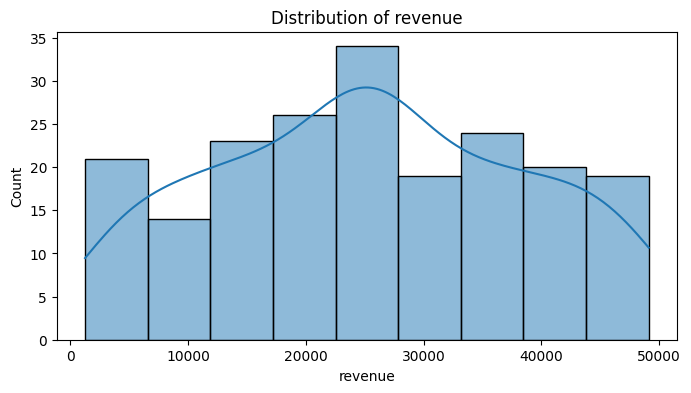

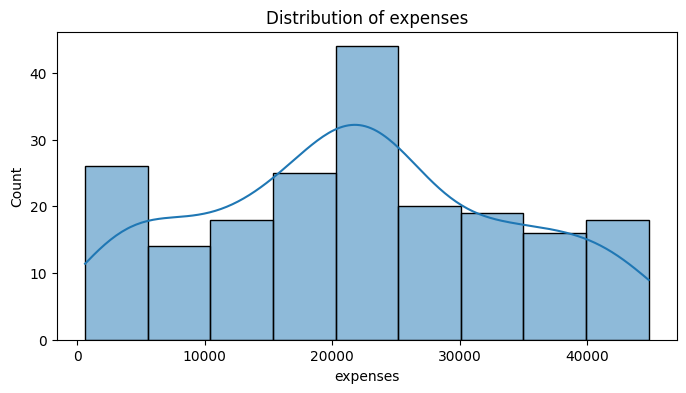

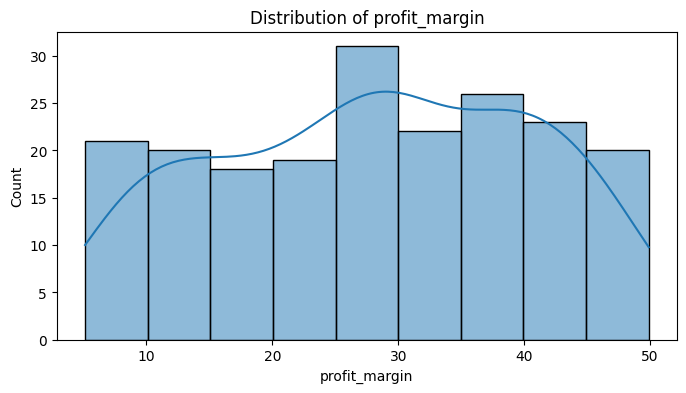

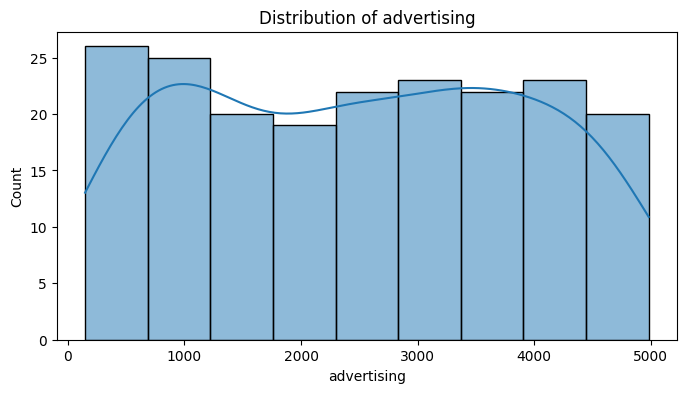

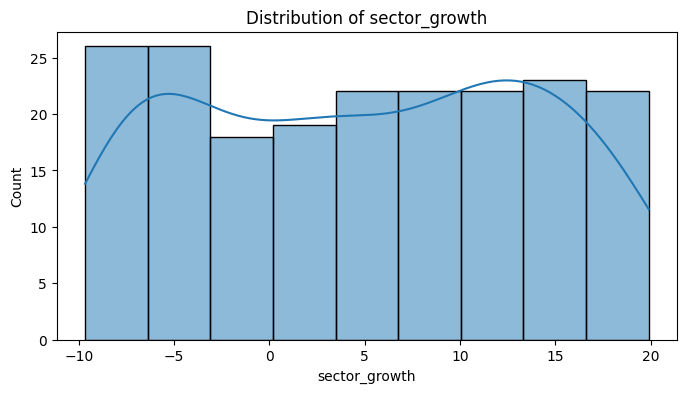

In [15]:
#Numerical columns for univariate analysis

num_cols = ['revenue', 'expenses', 'profit_margin', 'advertising', 'sector_growth']

for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_Small_Business[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


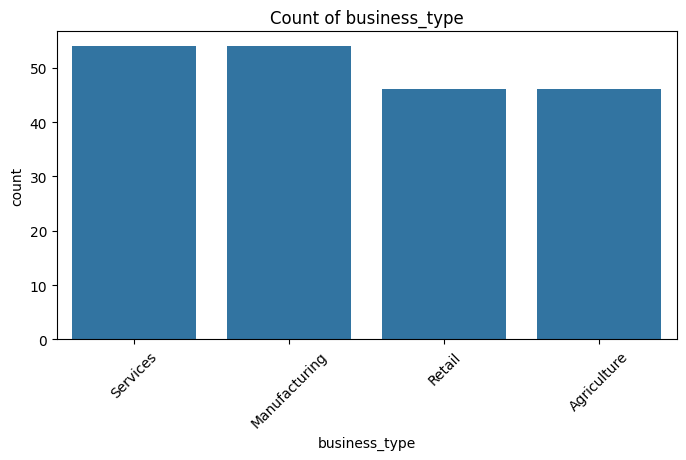

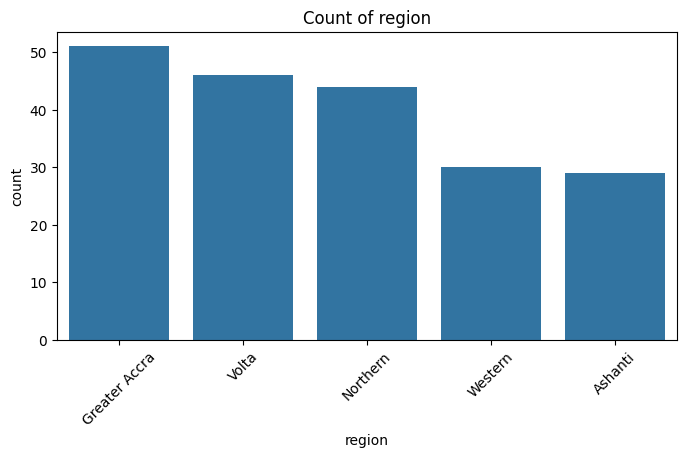

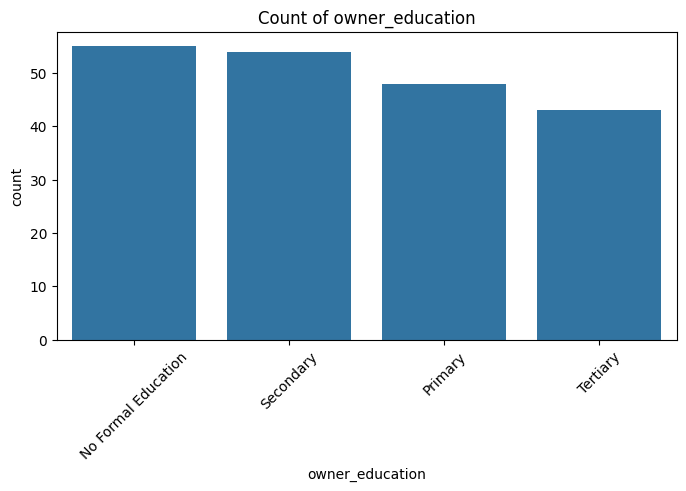

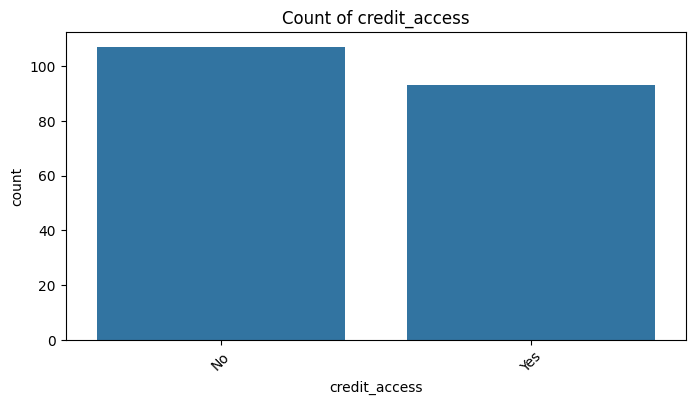

In [16]:
#Categorical columns for univariate analysis
cat_cols = ['business_type', 'region', 'owner_education', 'credit_access']

for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=df_Small_Business[col], order=df_Small_Business[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.show()


## Bivariate analysis

Purpose: Explore the relationship between two variables (numerical vs numerical or numerical vs categorical).

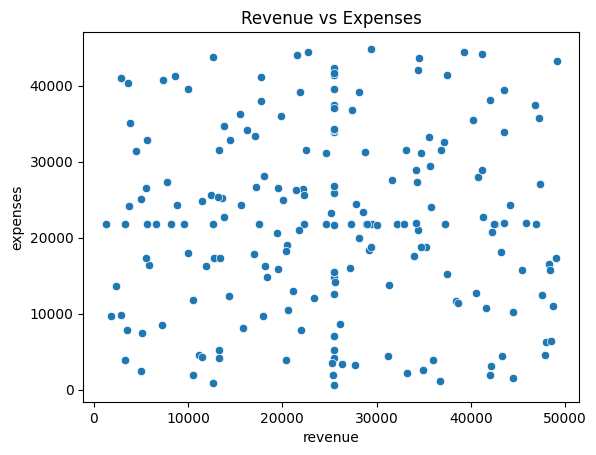

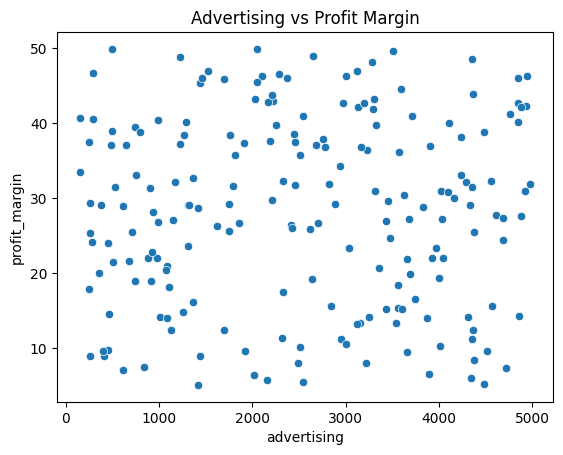

In [17]:
#Numerical columns vs numerical columns for bivariate analysis

sns.scatterplot(data=df_Small_Business, x='revenue', y='expenses')
plt.title('Revenue vs Expenses')
plt.show()

sns.scatterplot(data=df_Small_Business, x='advertising', y='profit_margin')
plt.title('Advertising vs Profit Margin')
plt.show()


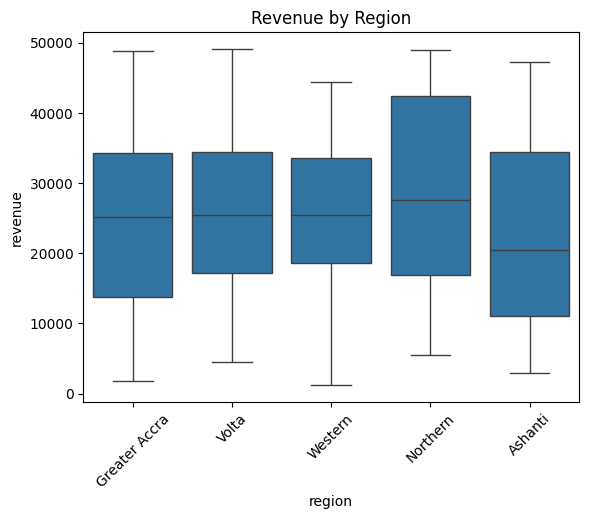

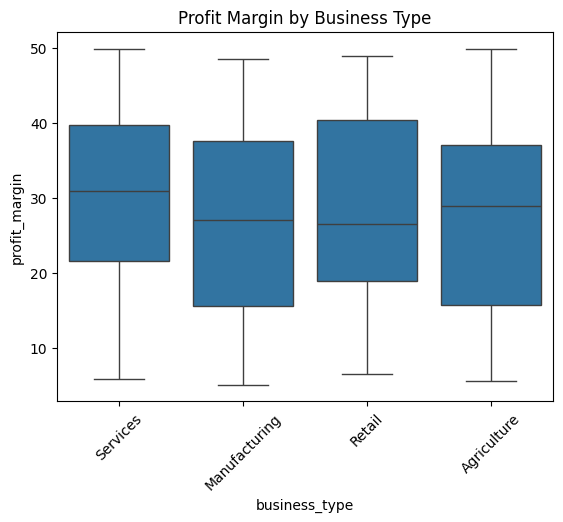

In [18]:
#Numerical columns vs categorical columns for bivariate analysis

sns.boxplot(data=df_Small_Business, x='region', y='revenue')
plt.title('Revenue by Region')
plt.xticks(rotation=45)
plt.show()

sns.boxplot(data=df_Small_Business, x='business_type', y='profit_margin')
plt.title('Profit Margin by Business Type')
plt.xticks(rotation=45)
plt.show()


## Multivariate analysis
Purpose: Explore relationships involving three or more variables to reveal deeper insights.

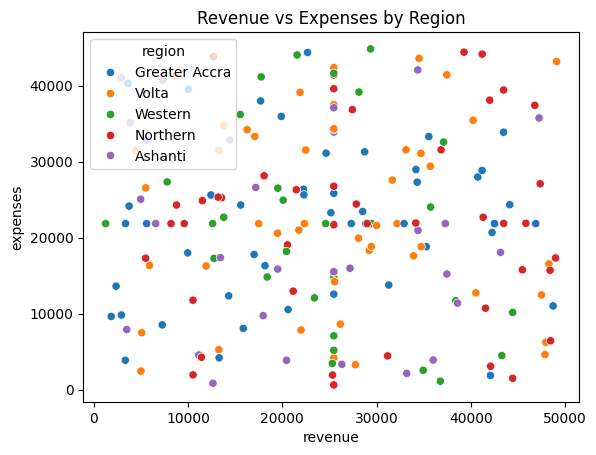

In [19]:
# Colored scatter plot with hue
sns.scatterplot(data=df_Small_Business, x='revenue', y='expenses', hue='region')
plt.title('Revenue vs Expenses by Region')
plt.show()


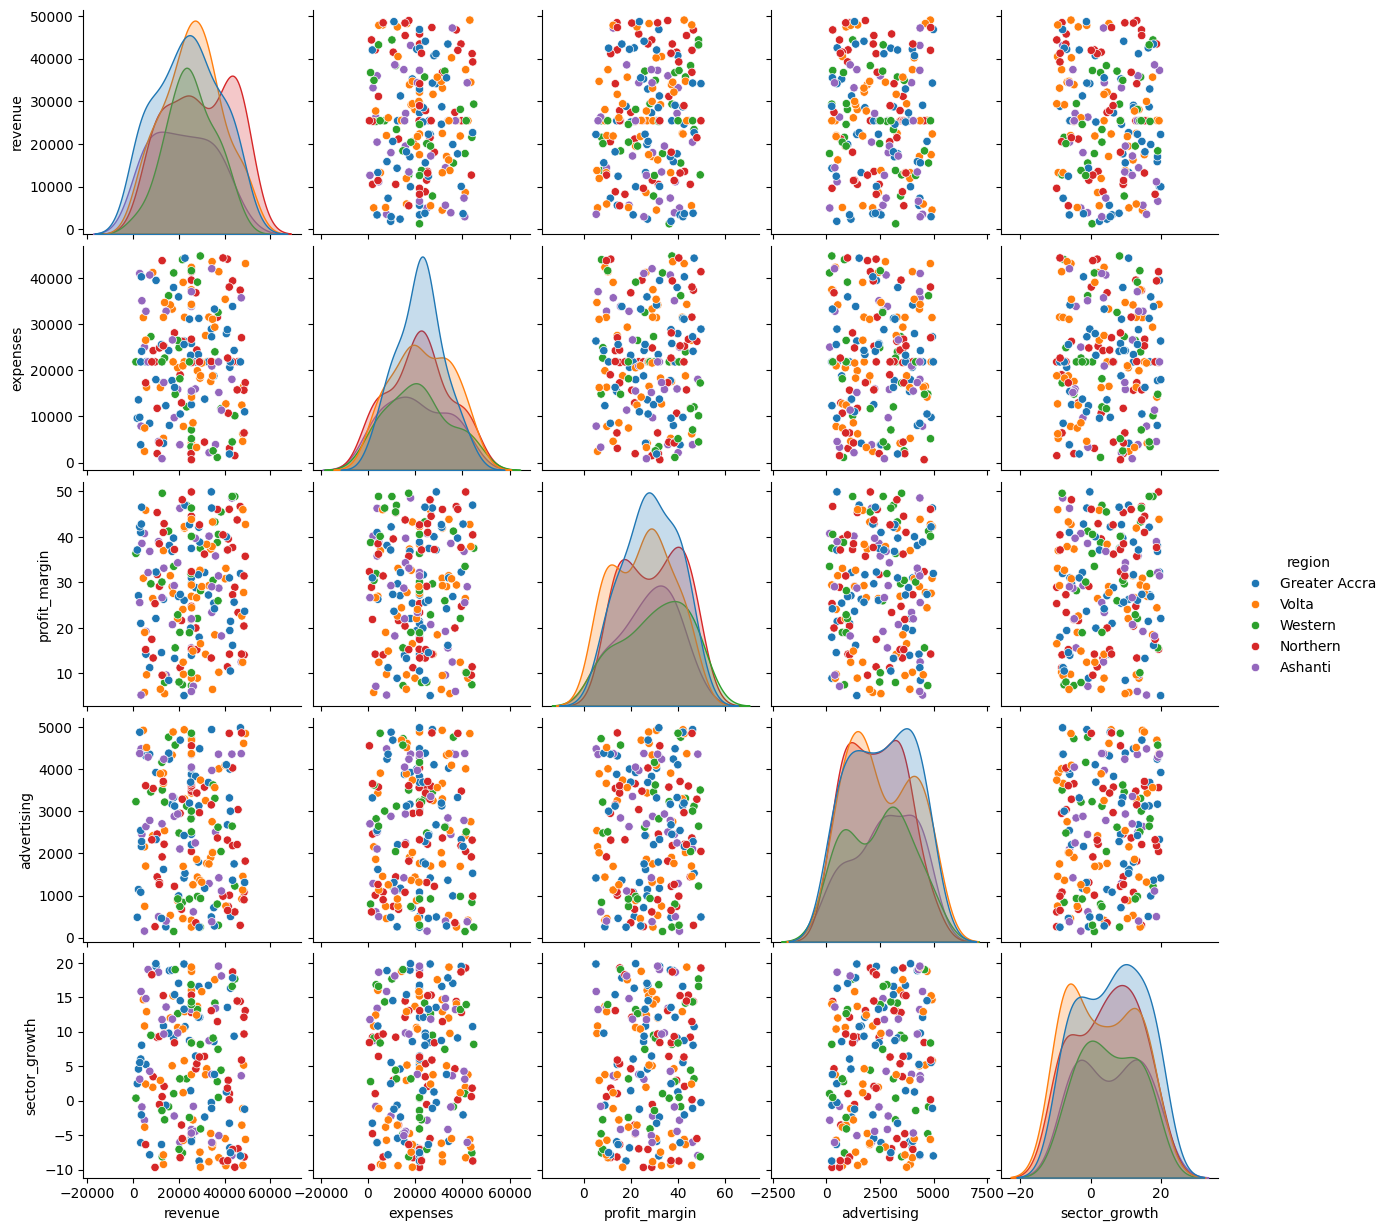

In [20]:
# Pairplot (multiple numerical relationships)

sns.pairplot(df_Small_Business, vars=['revenue', 'expenses', 'profit_margin', 'advertising', 'sector_growth'], hue='region')
plt.show()


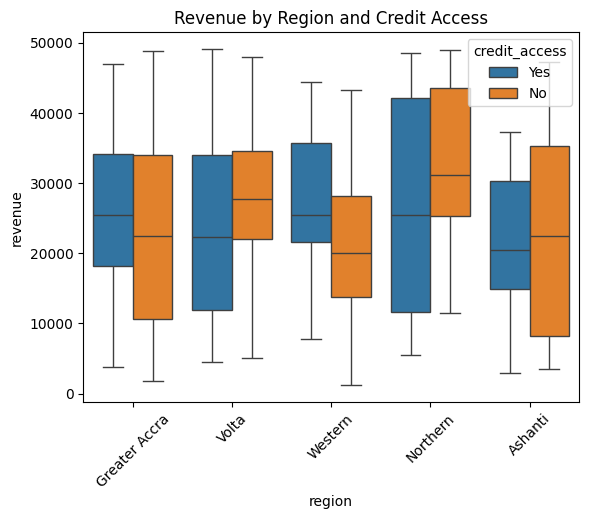

In [21]:
#Boxplot with multiple grouping
sns.boxplot(data=df_Small_Business, x='region', y='revenue', hue='credit_access')
plt.title('Revenue by Region and Credit Access')
plt.xticks(rotation=45)
plt.show()
